In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

from metpy.cbook import get_test_data

ds = xr.open_dataset(get_test_data('narr_example.nc'))
data_var_T = ds.metpy.parse_cf('Temperature')
data_var_H = ds.metpy.parse_cf('Specific_humidity')
data_var_uw = ds.metpy.parse_cf('u_wind')
data_var_vw = ds.metpy.parse_cf('v_wind')


In [4]:
ds

<xarray.Dataset> Size: 21MB
Dimensions:              (time: 1, isobaric: 29, y: 118, x: 292)
Coordinates:
  * time                 (time) datetime64[ns] 8B 1987-04-04T18:00:00
  * isobaric             (isobaric) float64 232B 1e+03 975.0 ... 125.0 100.0
  * y                    (y) float64 944B -3.087e+03 -3.054e+03 ... 678.9 711.4
  * x                    (x) float64 2kB -3.977e+03 -3.945e+03 ... 5.47e+03
Data variables:
    Temperature          (time, isobaric, y, x) float32 4MB ...
    Lambert_Conformal    |S1 1B ...
    lat                  (y, x) float64 276kB ...
    lon                  (y, x) float64 276kB ...
    u_wind               (time, isobaric, y, x) float32 4MB ...
    v_wind               (time, isobaric, y, x) float32 4MB ...
    Geopotential_height  (time, isobaric, y, x) float32 4MB ...
    Specific_humidity    (time, isobaric, y, x) float32 4MB ...
Attributes: (12/14)
    Conventions:              CF-1.0
    Originating_center:       US National Weather Service - NCEP(WMC) (7)
    Originating_subcenter:    The North American Regional Reanalysis (NARR) P...
    Generating_Model:         North American Regional Reanalysis (NARR)
    Product_Type:             Forecast/Uninitialized Analysis/Image Product
    title:                    US National Weather Service - NCEP(WMC) North A...
    ...                       ...
    history:                  Direct read of GRIB-1 into NetCDF-Java 4 API
    CF:feature_type:          GRID
    file_format:              GRIB-1
    location:                 /nomads3_data/raid2/noaaport/merged/narr/198704...
    _CoordinateModelRunDate:  1987-04-04T18:00:00Z
    History:                  Translated to CF-1.0 Conventions by Netcdf-Java...

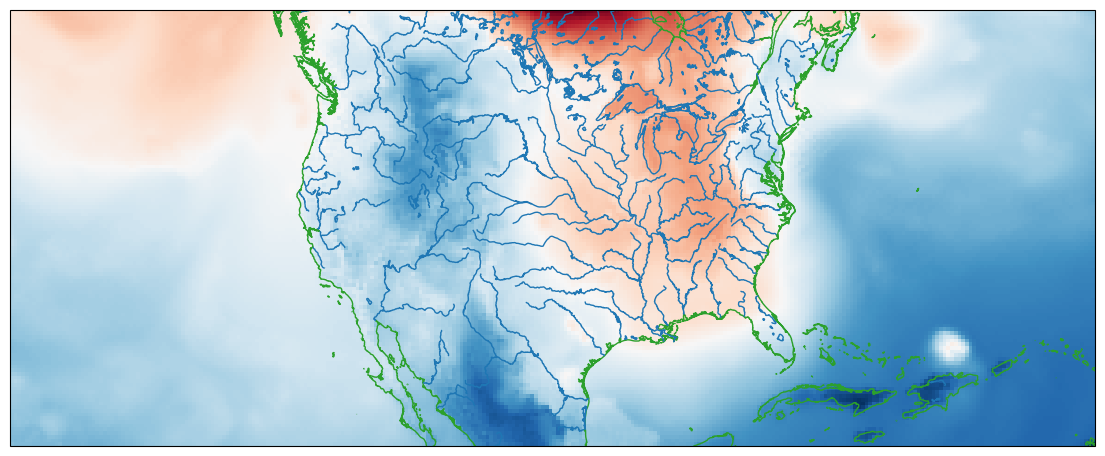

In [19]:
x = data_var_T.x
y = data_var_T.y

im_data = data_var_T.isel(time=0).sel(isobaric=1000.)


fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1, 1, 1, projection=data_var_T.metpy.cartopy_crs)
ax.imshow(im_data, extent=(x.min(), x.max(), y.min(), y.max()), cmap='RdBu', origin = 'lower' if y[0] < y[-1] else 'upper')
ax.coastlines(color='tab:green', resolution='10m')
ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none',edgecolor='tab:blue')
ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue' )

plt.show()

